# Biodiversity

## Introduction

The goal of this project is to interpret data from the National Parks Service about endangered species in different parks.
This project will report some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.
Here are some questions this project will answer:
- What is the distribution of conservation_status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

## Scoping

### Project Goals

The target of this analysis is the biodiversity in National Park. The primary goals will be to comprehend the features of the species, their situation with regard to conservation, and the interaction between those species and the national parks.
Some questions which will be answered in this project are:
- What is the distribution of conservation_status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

### Data
There are two datasets which are provided by Codecademy including Observations.csv and Species_info.csv. The first csv file has has observations of species with park locations and the other has data about species in National Park.

### Analysis
This analysis will use data visualization and descriptive statistic to fulfill the goals above. Statistical inference can be employed to determine to test if the observed values and hypothesis are statistically significant

### Evaluation
The questions set will be rechecked to check the output of analysis can fulfill the goal. This section will also provide some insights from the analysis process, and check whether any of the questions could not be resolved. The analysis will be posted on Codeacademy forum to get feedback from other people.

## Analysis

### Load the data, check the cleanliness

In [3]:
#import necessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### species_info.csv

In [5]:
species = pd.read_csv('species_info.csv',encoding='utf-8', low_memory=False)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The columns in the data set include:
- category - The category of taxonomy for each species
- scientific_name - The scientific name of each species
- common_names - The common names of each species
- conservation_status - The species conservation status

In [9]:
print(species.shape)

(5824, 4)


In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


We could see that there may not any missing data in the first three columns. However, conservation_status has too much missing data, so we need to be careful when conduct analysis on this variable

In [10]:
species.drop_duplicates(inplace=True)
species.shape #there is no duplicate

(5824, 4)

#### observations.csv

In [11]:
observations = pd.read_csv('observations.csv', encoding='utf-8',low_memory=False)
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The columns of observations dataframe are:
- scientific_name - The scientific name of each species
- park_name - The name of the national park
- observations - The number of observations in the past 7 days

In [12]:
observations.shape

(23296, 3)

In [13]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


There seems to have no missing data in observations.

In [14]:
observations.drop_duplicates(inplace=True)
observations.shape #there is are some duplicate rows

(23281, 3)

In [15]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.5+ KB


We can see that both dataframes have a similar column named scientific_name. However, species has 5824 rows while onservations has 23281 rows

### Exploratory Data Analysis

#### species df

In [18]:
#number of unique species
print("Number of species {}".format(species.scientific_name.nunique()))

umber of species 5541


In [19]:
print("Number of categories {}".format(species.category.nunique())) #the number is not too large

Number of categories 7


In [24]:
print("Number of each category {}".format(species.groupby("category").size()))

Number of each category category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


D:\anaconda\anaconda_2021.11-Install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


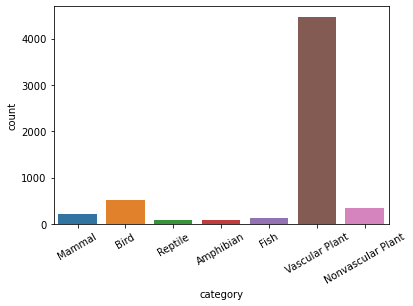

In [39]:
ax = sns.countplot(species["category"])
ax.set_xticklabels(species["category"].unique(),rotation=30, fontsize=10)
plt.show()
#we can see that the plant categorys has the most observations

In [40]:
print("Num of conservation statuses:{}".format(species.conservation_status.nunique()))
print("Unique conservation statuses:{}".format(species.conservation_status.unique()))

Num of conservation statuses:4
Unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [41]:
print(species.groupby(by="conservation_status", dropna=False).size())

conservation_status
Endangered              16
In Recovery              4
Species of Concern     161
Threatened              10
NaN                   5633
dtype: int64


After see the unique values of conservation_status, I think NaN value indicates a safe conservation status for species. So the dataset is pretty clean and I can fill NaN value by `No Intervention` status

In [52]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

#### observation df

In [45]:
print("Number of species in observations {}".format(observations.scientific_name.nunique()))
# we have the same number of unique species in observations

Number of species in observations 5541


In [46]:
print("Number of parks {}".format(observations["park_name"].nunique())) #the number is not too large
print("Number of each park {}".format(observations.groupby("park_name").size()))

Number of parks 4
Number of each park park_name
Bryce National Park                    5823
Great Smoky Mountains National Park    5818
Yellowstone National Park              5819
Yosemite National Park                 5821
dtype: int64


D:\anaconda\anaconda_2021.11-Install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


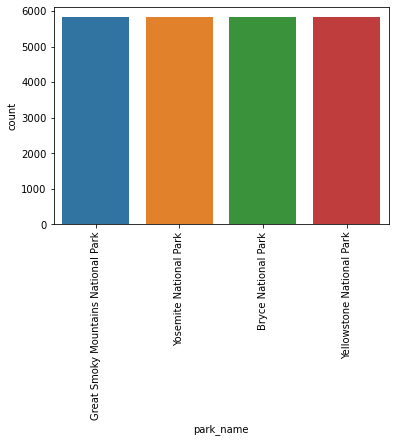

In [50]:
plt.clf()
ax = sns.countplot(observations["park_name"])
ax.set_xticklabels(observations["park_name"].unique(),rotation=90, fontsize=10)
plt.show()
#we can see that all park has the similar number of observations

### Main Analysis

#### What is the distribution of conservation_status for animals?

I will exclude the No Intervention because it is the major of the conservation status

In [70]:
conser_species= species[species.conservation_status != "No Intervention"]
status_category_feq = pd.crosstab(conser_species.conservation_status, conser_species.category)
print(status_category_feq)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                   1     4     3       7                  0   
In Recovery                  0     3     0       1                  0   
Species of Concern           4    72     4      28                  5   
Threatened                   2     0     4       2                  0   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered                 0               1  
In Recovery                0               0  
Species of Concern         5              43  
Threatened                 0               2  


<Figure size 432x288 with 0 Axes>

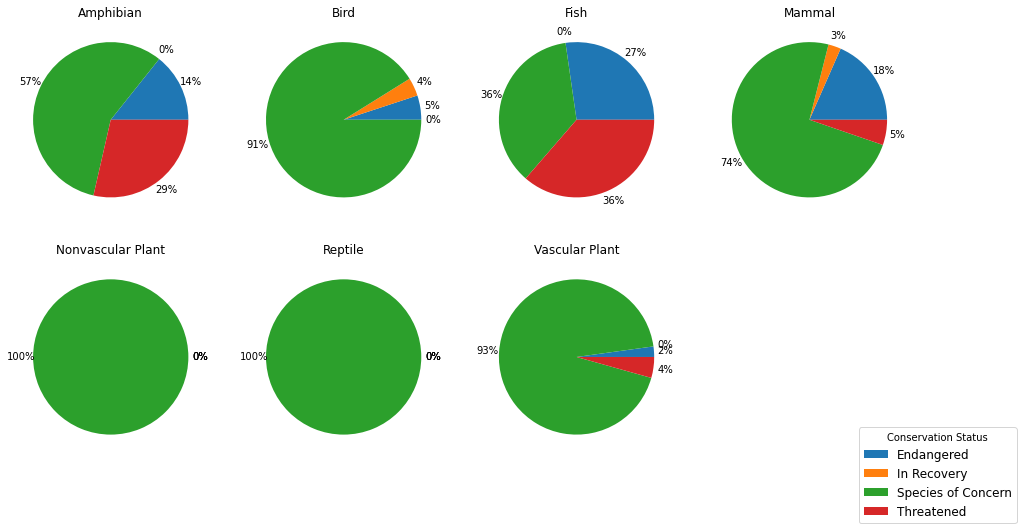

In [125]:
plt.clf()

fig, axs= plt.subplots(2,4)
fig.set_size_inches(16,8)
axs= axs.flatten()
for i in range(conser_species.category.nunique()):
    axs[i].pie(status_category_feq[status_category_feq.columns[i]], autopct='%1.0f%%', pctdistance=1.15)
    axs[i].set_title(status_category_feq.columns[i])
axs[-1].remove()
fig.legend(status_category_feq.index, loc=4, fontsize='large',title="Conservation Status")
plt.show()

We can see that Species of concern is the most popular conservation status (exclude No Intervention) in most category.

#### Are certain types of species more likely to be endangered?

This question can be determined by calculate the percentage of danger status in each species.

Because the animal which is endangered is also protected. Therefore, I created new variable for this type of animal

In [126]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [130]:
category_protected_feq = pd.crosstab(species.category, species.is_protected)
category_protected_feq

is_protected,False,True
category,,
Amphibian,73,7
Bird,442,79
Fish,116,11
Mammal,176,38
Nonvascular Plant,328,5
Reptile,74,5
Vascular Plant,4424,46


In [141]:
category_protected_prop =category_protected_feq[True]/category_protected_feq.sum(axis=1)*100
category_protected_prop

category
Amphibian             8.750000
Bird                 15.163148
Fish                  8.661417
Mammal               17.757009
Nonvascular Plant     1.501502
Reptile               6.329114
Vascular Plant        1.029083
dtype: float64

From this analysis, one can see that mammals and birds are more likely to be endangered

#### Are the differences between species and their conservation status significant?

I will conduct the Chi-Square test in this case. However, the test is more effective and useful if we use a binary variable. This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. I choose 0.05 as significant threshold

In [144]:
from scipy.stats import chi2_contingency
protected_category_feq = pd.crosstab(species.is_protected,species.category)
chi2, pval, dof, expected = chi2_contingency(protected_category_feq)
print(pval)

3.095911909904608e-98


Therefore,it is likely that category and is_protected association is significant.

I will conduct the Chi-Squared Test for each pair of value, however, the threshold should be lowered down to 0.05/21=0.00238095238  (there is 21 pairs of value in this case)

In [151]:
cat = list(species.category.unique())
sub1= species.copy()
for x in range(0,len(cat)-1):
    for y in range(x+1,len(cat)):
        recode = { cat[x]:cat[x], cat[y]:cat[y]}
        sub1['temp'] = sub1['category'].map(recode)
        cont=pd.crosstab(sub1['is_protected'], sub1['temp'])
        cs= chi2_contingency(cont)
        print("\n", cat[x], " versus ", cat[y],
              "Chi value: ", cs[0], "\t\tp value: ", cs[1])


 Mammal  versus  Bird Chi value:  0.5810483277947567 		p value:  0.445901703047197

 Mammal  versus  Reptile Chi value:  5.139702724228909 		p value:  0.02338465214871547

 Mammal  versus  Amphibian Chi value:  2.9824977480013515 		p value:  0.08416928847464508

 Mammal  versus  Fish Chi value:  4.644937895246063 		p value:  0.031145264082780604

 Mammal  versus  Vascular Plant Chi value:  315.0493897752202 		p value:  1.73491124376035e-70

 Mammal  versus  Nonvascular Plant Chi value:  45.309986795376076 		p value:  1.6818930744695664e-11

 Bird  versus  Reptile Chi value:  3.742911272135716 		p value:  0.053031969869125097

 Bird  versus  Amphibian Chi value:  1.8325402556663934 		p value:  0.17582779760374145

 Bird  versus  Fish Chi value:  3.085932418313973 		p value:  0.07897198996788664

 Bird  versus  Vascular Plant Chi value:  375.988639139334 		p value:  9.296288431402029e-84

 Bird  versus  Nonvascular Plant Chi value:  41.22733687273035 		p value:  1.355139751924416e-10

 

Mammal  versus  Vascular Plant
 Mammal  versus  Nonvascular Plant
Bird  versus  Vascular Plant
Bird  versus  Nonvascular Plant
Reptile  versus  Vascular Plant
Amphibian  versus  Vascular Plant
Fish  versus  Vascular Plant

The above is the category pair which show the significant difference between species and conservation status

#### Which species were spotted the most at each park?

In [180]:
df1 =pd.merge(observations, species)
df1.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False


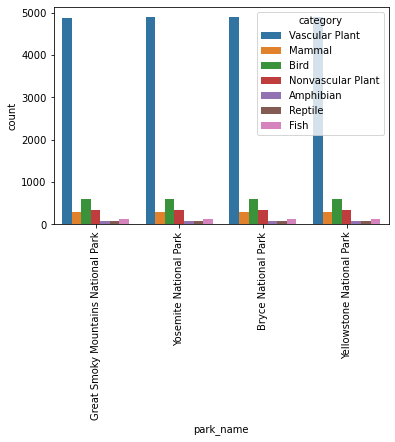

In [187]:
plt.clf()
ax = sns.countplot(data =df1, x="park_name", hue="category")
ax.set_xticklabels(observations["park_name"].unique(),rotation=90, fontsize=10)
plt.show()
#we can see that all park has the similar number of observations

we can see Vascular Plant appear the most and it can be found easily in every park in the dataset

In [188]:
observations['scientific_name'].value_counts(sort=True)

Castor canadensis                       12
Canis lupus                             12
Hypochaeris radicata                    12
Procyon lotor                           12
Holcus lanatus                          12
                                        ..
Packera dimorphophylla var. paysonii     4
Smilax bona-nox                          4
Chondestes grammacus                     4
Leymus triticoides                       4
Dichanthelium depauperatum               4
Name: scientific_name, Length: 5541, dtype: int64

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:
- What is the distribution of conservation_status for animals?
    - most is not part of conservation
- Are certain types of species more likely to be endangered?
    - Mammals and Birds
- Are the differences between species and their conservation status significant?
    - yes. However, not every pair of categories has a significant difference
- Which species were spotted the most at each park?
    - Vascular Plant
    -

